#  实验结果记录

In [3]:
# 记录使用input anderson normalize(0, 1)后的结果
import os
import h5py
import numpy as np
import matplotlib.pyplot as plt

import torch
import pandas as pd

# h5py
```
{
"model_000":{
    'train_loss_per_batch':[],
    'train_loss_per_epoch': [],
    'validate_loss_per_batch': [],  #可选
    'validate_loss_per_epoch':[],    #可选
    'test_loss_per_epoch':[],
    'test_loss_per_batch':[]
        
    }
"model_001":{}
}
```

In [4]:
def plot_loss_epoch(file, title, n_model='model_000', train_only=False, begin=0):
        with h5py.File(file, 'r') as loss_f:
            train_grp = loss_f[n_model]
            train_loss = train_grp['train_loss_per_epoch'][:]
            validate_loss = train_grp['validate_loss_per_epoch'][:]

            test_loss = train_grp['test_loss_per_epoch'][:]
            # plot mse rather rmse , make confuse
            train_loss = np.array(train_loss)
            validate_loss = np.array(validate_loss)
            test_loss = np.array(test_loss)
            # plt.figure(figsize=(15, 5))
            plt.plot(np.arange(len(train_loss) - begin)+1 + begin, train_loss[begin:], '-o', label='train')
            if train_only is False:
                plt.plot(np.arange(len(validate_loss) - begin)+1 + begin, validate_loss[begin:], '-o', label='validate')
            plt.plot(len(train_loss), test_loss[0], '-o', label='test')
            
            plt.grid()
            plt.xlabel('Epoch')
            plt.ylabel('MSE')
            plt.yscale('log')
            plt.title(label=title)
            plt.legend()
            print(f'train_loss mse: {train_loss}')
            print(f'validate_loss mse: {validate_loss}')
            print(f'test_loss mse: {test_loss}')
            

In [5]:
def compare_loss(file_1, file_2, n_model='model_000', title='none'):
    fig, axes = plt.subplots(1,2, figsize=(12, 5))
    fig.text(0.5, 0, 'Epoch')
    fig.text(0, 0.5, 'MSE', rotation='vertical')
    h5_1 = h5py.File(file_1, 'r')
    train_grp_1 = h5_1[n_model]
    train_loss_1 = train_grp_1['train_loss_per_epoch'][:]
    validate_loss_1 = train_grp_1['validate_loss_per_epoch'][:]
    test_loss_1 = train_grp_1['test_loss_per_epoch'][:]
    print(f'file_1 train loss, mse: {train_loss_1[-5:]}')
    print(f'file_1 test loss, mse: {test_loss_1}')

    h5_2 = h5py.File(file_2, 'r')
    train_grp_2 = h5_2[n_model]
    train_loss_2 = train_grp_2['train_loss_per_epoch'][:]
    validate_loss_2 = train_grp_2['validate_loss_per_epoch'][:]
    print(f'validate {validate_loss_2}')
    test_loss_2 = train_grp_2['test_loss_per_epoch'][:]
    print(f'file_2 train loss, mse: {train_loss_2[-5:]}')
    print(f'file_2 test loss, mse: {test_loss_2}')
    print()
    
    axes[0].plot(train_loss_1, '-o', label=f'{file_1}')
    axes[0].plot(train_loss_2, '-o', label=f'{file_2}')
    axes[0].set_title('train')
    axes[0].legend()
    axes[0].grid()
    axes[0].set_yscale('log')
    
    axes[1].plot(validate_loss_1, '-o', label=f'{file_1}')
    axes[1].plot(validate_loss_2, '-o', label=f'{file_2}')
    axes[1].set_title('validate')
    axes[1].legend()
    axes[1].grid()
    axes[1].set_yscale('log')
    plt.show()


In [ ]:
# model_0使用config_3.json

## layer 7

## test1
使用 chebyshev_median.h5中的中位数，4000的训练集，查看模型的loss。

In [4]:
training_file = "datasets/chebyshev_4000.h5"
testing_file = "datasets/chebyshev_testing_1000.h5",
# train data


train_loss mse: [5.08408592e+00 2.66730606e-01 1.66443291e-01 8.03078543e-02
 3.70912541e-02 2.66282054e-02 2.04383588e-02 8.20012155e-03
 6.75304993e-03 5.25338993e-03 1.53074046e-03 1.14429557e-03
 1.40386895e-03 7.92027568e-04 7.24743504e-04 7.16691576e-04
 4.97783878e-04 5.02072025e-04 4.34109838e-04 3.68563435e-04]
validate_loss mse: [3.65261965e-01 1.19091744e-01 6.92017426e-02 4.62528423e-02
 4.92919880e-02 1.56615986e-02 5.48820771e-03 1.28129716e-02
 3.19876808e-03 2.23378245e-03 9.55637439e-04 1.58521568e-03
 1.06207589e-03 6.53060121e-04 7.85526903e-04 5.49018108e-04
 5.08675867e-04 4.98438953e-04 3.79041263e-04 3.64482359e-04]
test_loss mse: [0.00039702]


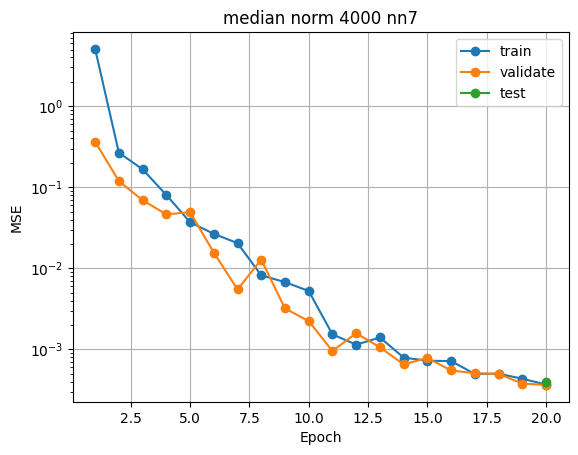

In [5]:
# plot epoch loss
plot_loss_epoch(file='nn_7/loss_1.h5', title="median norm 4000 nn7", begin=0)

In [7]:
file = 'nn_7/loss_1.h5'
h5 = h5py.File(file, 'r')
h5['model_000']['train_loss_per_batch'][-8:],h5['model_000']['validate_loss_per_batch'][-2:]

(array([0.00047923, 0.00045775, 0.00038872, 0.00041075, 0.00035946,
        0.00037398, 0.00036788, 0.00037293]),
 array([0.00037904, 0.00036448]))

epoch 1 in training:  90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                  | 9/10 [00:00<00:00, 13.36it/s]
                                                                                                                                                                                                                                                 train-mlp - INFO - Epoch : 1/20  train loss: 0.6275382767

  0%|                                                                                                                                                                                                                     | 0/1 [00:00<?, ?it/s]
                                                                                                                                                                                                                          

train_loss mse: [6.27538277e-01 5.12334459e-02 1.25685229e-02 5.34945482e-03
 1.82504203e-03 8.73599123e-04 5.58533126e-04 3.86052674e-04
 2.80290664e-04 2.27514887e-04 1.99511670e-04 1.89809618e-04
 1.80482746e-04 1.72110146e-04 1.63901520e-04 1.55747105e-04
 1.48311597e-04 1.41613353e-04 1.34810773e-04 1.29125904e-04]
validate_loss mse: [0.0890895  0.01215144 0.00907815 0.00317628 0.00088879 0.00067911
 0.00050655 0.00034147 0.0002595  0.00021426 0.00019983 0.00018929
 0.00018006 0.00017091 0.00016214 0.00015399 0.00014638 0.00013927
 0.0001326  0.00012634]
test_loss mse: [0.00013843]


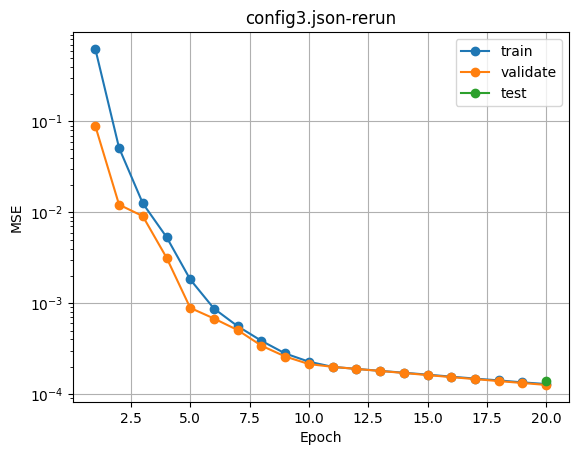

In [7]:
from run_mlp import main
from nn_models import MyMLP_7 as MyMLP   
loss_file='nn_7loss_config_3.h5'
main('config_3.json', network=MyMLP, loss_file=loss_file)
plot_loss_epoch(loss_file, title='config3.json-nn7')

# layer 14

## test2
与test1 相比，使用MyMLP_14，查看模型的loss。

In [8]:
file = 'nn_14/loss_2.h5'
h5 = h5py.File(file, 'r')
h5['model_000']['train_loss_per_batch'][-8:],h5['model_000']['validate_loss_per_batch'][-2:]

(array([8.56279566e-05, 7.98107097e-05, 8.61176768e-05, 8.15223096e-05,
        5.92012271e-05, 5.56063099e-05, 4.41345815e-05, 4.80916851e-05]),
 array([6.20091832e-05, 5.39181759e-05]))

train_loss mse: [6.71578120e-01 1.98371262e+00 4.92087553e-01 4.47032618e-01
 3.25647667e-01 1.91559125e-01 6.57988686e-02 1.24151834e-02
 6.12574654e-03 2.13067454e-03 7.69239597e-04 5.71349577e-04
 1.16890218e-04 3.35904548e-04 1.00123970e-04 1.23063339e-04
 1.14462284e-04 5.59286663e-05 8.32696632e-05 5.17584509e-05]
validate_loss mse: [1.50413148e-01 4.59145944e-01 4.85009295e-01 3.74149378e-01
 2.41859117e-01 1.09609658e-01 5.23165026e-03 1.62339931e-02
 2.75309960e-03 3.94708938e-04 9.32290381e-04 7.76139693e-05
 3.26387439e-04 1.89833825e-04 7.34357973e-05 1.60718769e-04
 5.11877333e-05 8.40251951e-05 6.20091832e-05 5.39181759e-05]
test_loss mse: [5.29240019e-05]


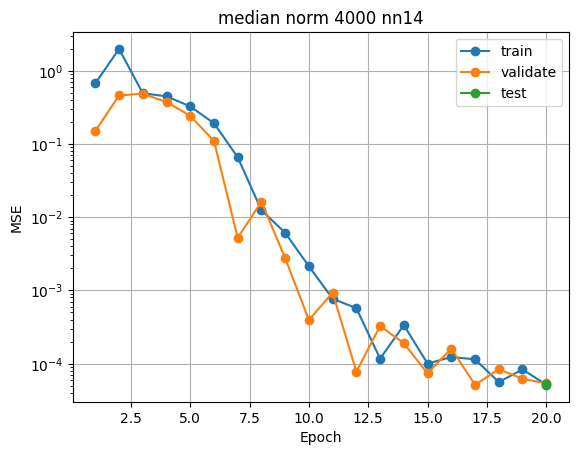

In [16]:
plot_loss_epoch(file='nn_14/loss_2.h5', title="median norm 4000 nn14", begin=0)


从上面看， 配置不变，网络加深，loss是变小了。,说明7层，模型过于简单

## test3
与test2相比，训练集变为10000，查看模型的loss。
- Increase the size of your training dataset

在比较数据集大小时，其他保持不变，训练数据从4000->10000, loss变小一些。

In [2]:
from run_mlp import main
from nn_models import MyMLP_14 as MyMLP   
main('config_3.json', network=MyMLP, loss_file='loss_test3.h5')

epoch 1 in training:  90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                  | 9/10 [00:00<00:00, 11.46it/s]
                                                                                                                                                                                                                                                 train-mlp - INFO - Epoch : 1/20  train loss: 0.6172460341

  0%|                                                                                                                                                                                                                     | 0/1 [00:00<?, ?it/s]
                                                                                                                                                                                                                          

train_loss mse: [6.17246034e-01 3.92534350e-02 1.94716195e-03 6.26924024e-04
 2.44399055e-04 1.01211188e-04 6.46370417e-05 5.24789635e-05
 4.79811810e-05 4.64184504e-05 4.59644335e-05 4.56870158e-05
 4.56444287e-05 4.55903262e-05 4.56043475e-05 4.55746831e-05
 4.56215779e-05 4.54835895e-05 4.56218576e-05 4.55808683e-05]
validate_loss mse: [1.33482723e-01 3.49291520e-03 1.13694902e-03 4.65865503e-04
 1.04215676e-04 5.81709012e-05 4.84837638e-05 4.69963736e-05
 4.72629149e-05 4.76919216e-05 4.70133856e-05 4.70694485e-05
 4.70255591e-05 4.69786357e-05 4.69756825e-05 4.70022124e-05
 4.69799893e-05 4.69756610e-05 4.69777193e-05 4.69930248e-05]
test_loss mse: [4.61090288e-05]


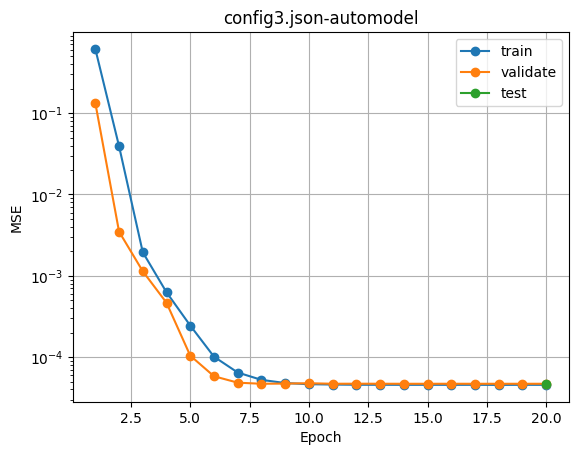

In [6]:
# 使用自动生成的网络，验证结果与test3一致
from run_mlp import main
from nn_models import MyMLP 

# main('config_3.json', network=MyMLP, layer_num=14, loss_file='loss_config3_automodel.h5')
loss_file='loss_config3_automodel.h5'
plot_loss_epoch(loss_file, title='config3.json-automodel')

train_loss mse: [6.17246034e-01 3.92534350e-02 1.94716195e-03 6.26924024e-04
 2.44399055e-04 1.01211188e-04 6.46370417e-05 5.24789635e-05
 4.79811810e-05 4.64184504e-05 4.59644335e-05 4.56870158e-05
 4.56444287e-05 4.55903262e-05 4.56043475e-05 4.55746831e-05
 4.56215779e-05 4.54835895e-05 4.56218576e-05 4.55808683e-05]
validate_loss mse: [1.33482723e-01 3.49291520e-03 1.13694902e-03 4.65865503e-04
 1.04215676e-04 5.81709012e-05 4.84837638e-05 4.69963736e-05
 4.72629149e-05 4.76919216e-05 4.70133856e-05 4.70694485e-05
 4.70255591e-05 4.69786357e-05 4.69756825e-05 4.70022124e-05
 4.69799893e-05 4.69756610e-05 4.69777193e-05 4.69930248e-05]
test_loss mse: [4.61090288e-05]


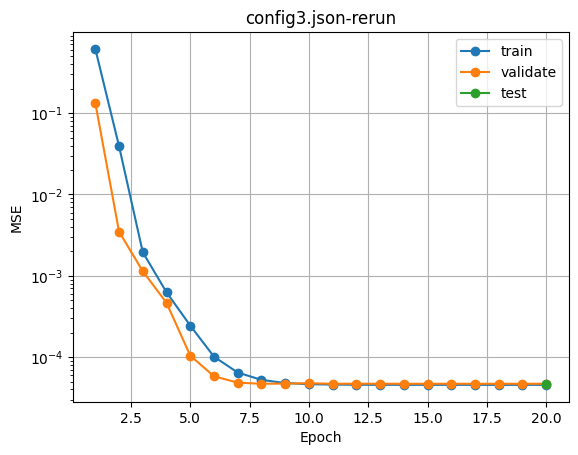

In [6]:
# 测试的效果一样
plot_loss_epoch('loss_test3.h5', title='config3.json-rerun')

In [10]:
# we use L6N255_10000.h5 to train 
training_file = "datasets/chebyshev_10000.h5"
testing_file = "datasets/chebyshev_testing_1000.h5"
config = 'config_3.json'


train_loss mse: [6.17246034e-01 3.92534350e-02 1.94716195e-03 6.26924024e-04
 2.44399055e-04 1.01211188e-04 6.46370417e-05 5.24789635e-05
 4.79811810e-05 4.64184504e-05 4.59644335e-05 4.56870158e-05
 4.56444287e-05 4.55903262e-05 4.56043475e-05 4.55746831e-05
 4.56215779e-05 4.54835895e-05 4.56218576e-05 4.55808683e-05]
validate_loss mse: [1.33482723e-01 3.49291520e-03 1.13694902e-03 4.65865503e-04
 1.04215676e-04 5.81709012e-05 4.84837638e-05 4.69963736e-05
 4.72629149e-05 4.76919216e-05 4.70133856e-05 4.70694485e-05
 4.70255591e-05 4.69786357e-05 4.69756825e-05 4.70022124e-05
 4.69799893e-05 4.69756610e-05 4.69777193e-05 4.69930248e-05]
test_loss mse: [4.61090288e-05]


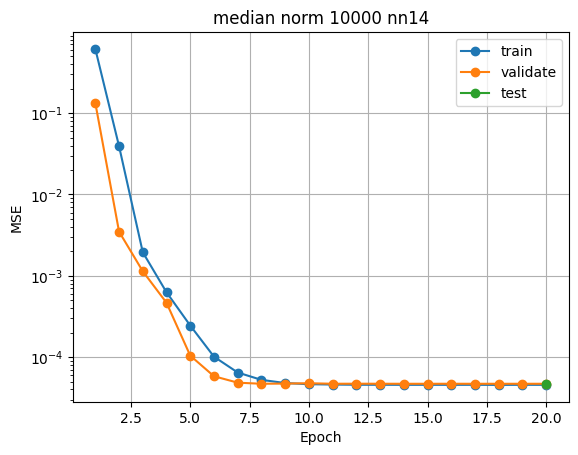

In [11]:
loss_f = 'nn_14/loss_3.h5'
plot_loss_epoch(loss_f, title="median norm 10000 nn14")
del loss_f
# 看着效果没有改善

file_1 train loss, mse: [1.23063339e-04 1.14462284e-04 5.59286663e-05 8.32696632e-05
 5.17584509e-05]
file_1 test loss, mse: [5.29240019e-05]
validate [1.33482723e-01 3.49291520e-03 1.13694902e-03 4.65865503e-04
 1.04215676e-04 5.81709012e-05 4.84837638e-05 4.69963736e-05
 4.72629149e-05 4.76919216e-05 4.70133856e-05 4.70694485e-05
 4.70255591e-05 4.69786357e-05 4.69756825e-05 4.70022124e-05
 4.69799893e-05 4.69756610e-05 4.69777193e-05 4.69930248e-05]
file_2 train loss, mse: [4.55746831e-05 4.56215779e-05 4.54835895e-05 4.56218576e-05
 4.55808683e-05]
file_2 test loss, mse: [4.61090288e-05]



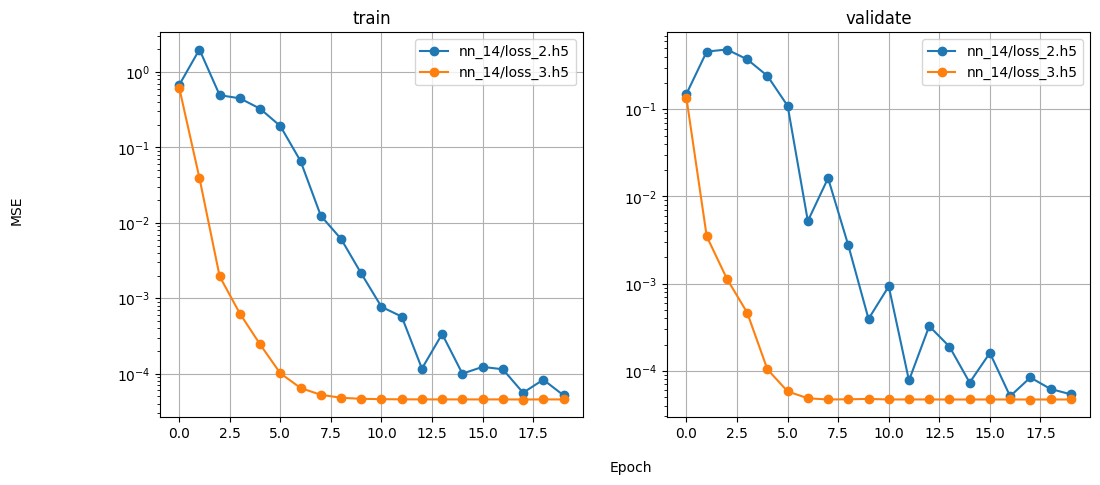

In [14]:
file_1 = 'nn_14/loss_2.h5'
file_2 = 'nn_14/loss_3.h5'
compare_loss(file_1, file_2)
del file_1, file_2
# 图 左边为 train size:4000, 右边为train size:10000

## test4
增加batch_size:1024----> 2048
差别不大，但是batch_size选择不一样，会导致loss 抖动

file_1 train loss, mse: [4.55804948e-05 4.56127593e-05 4.54735048e-05 4.56148473e-05
 4.55725266e-05]
file_1 test loss, mse: [4.60964136e-05]
validate [2.69441077e-01 4.93753481e-01 2.60745276e-01 2.30398356e-02
 1.06310130e-04 1.35199669e-02 6.61591609e-05 1.90116891e-03
 1.62659281e-04 4.72254896e-05 5.11725747e-05 5.68070116e-05
 5.60141740e-05 5.15432706e-05 4.83041399e-05 4.70310149e-05
 4.71282510e-05 4.74345501e-05 4.74380159e-05 4.72213309e-05]
file_2 train loss, mse: [4.63410594e-05 4.55904164e-05 4.57563300e-05 4.60018033e-05
 4.59384144e-05]
file_2 test loss, mse: [4.63651236e-05]



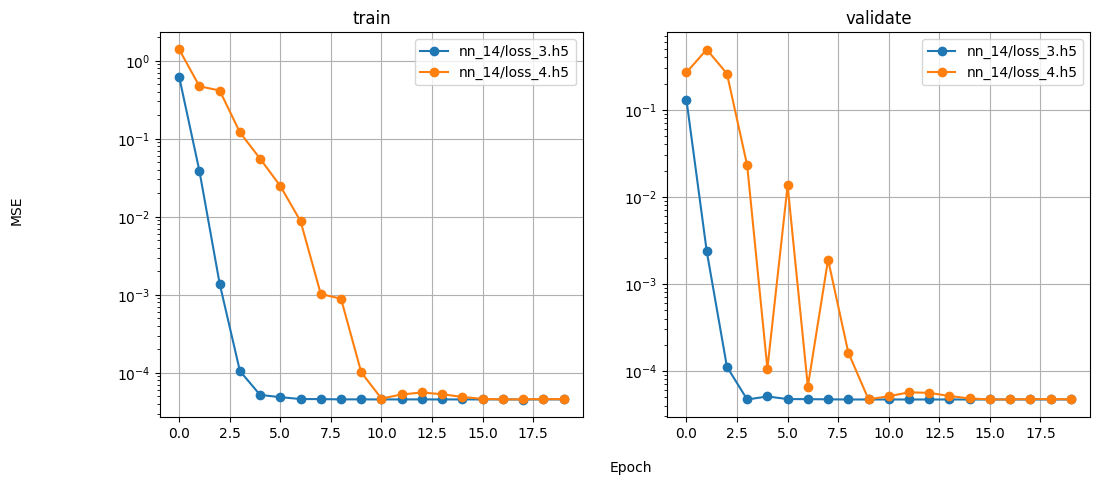

In [16]:
file_1 = 'nn_14/loss_3.h5'   # 1024
file_2 = 'nn_14/loss_4.h5'   # 2048
compare_loss(file_1, file_2, title='batchsize 1024 ---> 2048')


train_loss mse: [6.16305818e-01 8.08053265e+00 5.92094849e-01 6.09600838e-01
 3.04490678e-01 2.75337369e-02 1.25241997e-01 6.44881135e-02
 3.80191000e-03 2.67977581e-02 3.66984110e-02 2.89227556e-02
 1.68003281e-02 6.30871729e-03 8.83092368e-04 5.18551068e-04
 2.53012890e-03 3.91149136e-03 3.45799196e-03 1.91735335e-03]
validate_loss mse: [2.17394422e-01 5.08441594e-01 6.42062987e-01 4.42950813e-01
 6.02451199e-02 8.89955965e-02 1.07008583e-01 4.67572280e-03
 1.73367195e-02 3.76801320e-02 3.25404109e-02 2.09023622e-02
 9.15699755e-03 1.83782847e-03 8.37653314e-05 1.80705055e-03
 3.72181537e-03 3.86423962e-03 2.48000238e-03 9.13568847e-04]
test_loss mse: [0.00091139]


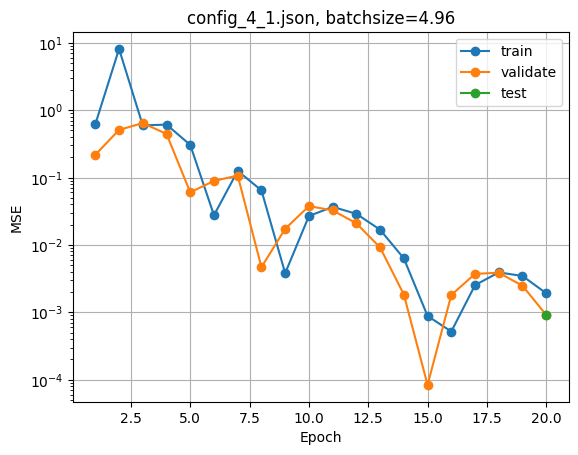

In [17]:
# config_4_1.json
# 基于config_4.json, 增加batchsize=4.96
plot_loss_epoch("nn_14/loss_4_1.h5", 'config_4_1.json, batchsize=4096')

train_loss mse: [1.81549184e+00 6.28496275e-01 5.10007787e-01 2.25343274e-01
 4.30787671e-02 3.76660705e-02 1.30377844e-03 5.63253423e-03
 2.38365278e-03 1.51681824e-03 7.03014748e-04 4.84911662e-04
 2.31391133e-04 7.97309486e-05 5.07315813e-05 9.08645035e-05
 1.29183455e-04 1.26903838e-04 9.45125782e-05 6.20371376e-05]
validate_loss mse: [5.27284135e-01 5.90906057e-01 3.29590068e-01 2.76927116e-02
 7.05809498e-02 1.12083041e-03 4.81709479e-03 4.67676333e-03
 2.66590166e-03 7.32523877e-04 5.72648456e-04 3.04954718e-04
 1.10827954e-04 4.71002619e-05 7.67381690e-05 1.24005124e-04
 1.36290845e-04 1.09888132e-04 7.26598417e-05 5.02781284e-05]
test_loss mse: [4.93216903e-05]


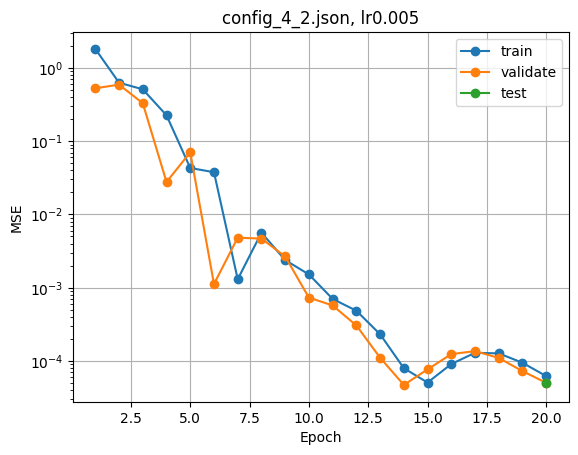

In [19]:
# config_4_2.json
# 基于config_4_1.json, lr从0.05改为0.005
plot_loss_epoch("nn_14/loss_4_2.h5", 'config_4_2.json, lr0.005')

## test5
与test3相比，数据集改成将anderson模型规范化，规范化为8个维度，每个维度的均值方差记在10000_norm_meta.h5，Chebyshev系数与test4一样，也是使用median规范化的。
- Normalize your input data
Scaling the input features to a similar range can prevent certain features from dominating the learning process and help the MLP model converge faster.

file_1 train loss, mse: [4.55746831e-05 4.56215779e-05 4.54835895e-05 4.56218576e-05
 4.55808683e-05]
file_1 test loss, mse: [4.61090288e-05]
validate [1.81169297e-02 6.06302007e-03 1.05411636e-03 9.30602906e-05
 1.10949998e-04 1.57485842e-04 7.30762861e-05 5.44762908e-05
 4.71962651e-05 4.71663845e-05 4.69783364e-05 4.70560389e-05
 4.69770303e-05 4.69757244e-05 4.69841227e-05 4.69835245e-05
 4.69812365e-05 4.69769714e-05 4.69768486e-05 4.69960204e-05]
file_2 train loss, mse: [4.55798242e-05 4.56192023e-05 4.54832483e-05 4.56241584e-05
 4.55810897e-05]
file_2 test loss, mse: [4.61115245e-05]



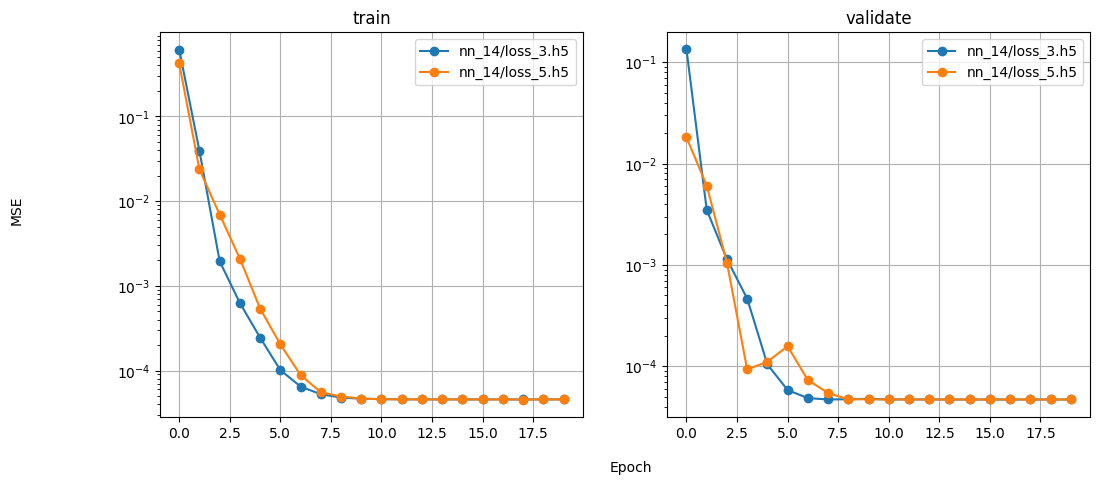

In [21]:

file_1 = 'nn_14/loss_3.h5'   # test4
file_2 = "nn_14/loss_5.h5"   # test5
compare_loss(file_1, file_2)

# test6
绘制spectrum
1. 训练256个网络
2. 使用网络预测alphas
3. 绘制alphas
4. 绘制预测的spectrum与真实的spectrum。

In [ ]:
# TODO
1. 测试的代码有错，model load 错了还是，测试结果不一致
2. 训练第二个模型，发现与第一个模型loss下降的很不一样。需要重新分析一下。

## **Adjust the architecture of your MLP**: 
Experiment with different numbers of hidden layers, neurons per layer, and activation functions to find the optimal configuration for your specific problem.
> resnet